# Introduction / Sample Sales Data

In [73]:
# Monthly Sales Prediction for each product line  
# Retail Sales Data sample "Sample Sales Data"  from kaggle.com
# with time series, product features, customer features and order quantity 


## Library Imports

In [2]:
# Import your libraries

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

## Exploratory Analysis

In [3]:
# Load data 
df = pd.read_csv('sales_data_sample.csv', encoding= 'unicode_escape')

In [4]:
# how many observations and features are there: 
print(df.shape)
df.head()

(2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
# all numeric featrues are in logical scale? any missing data?  
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
#Do all feature data types make sense?
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [7]:
# ORDERDATE to Datetime 
df.ORDERDATE = pd.to_datetime(df.ORDERDATE)
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

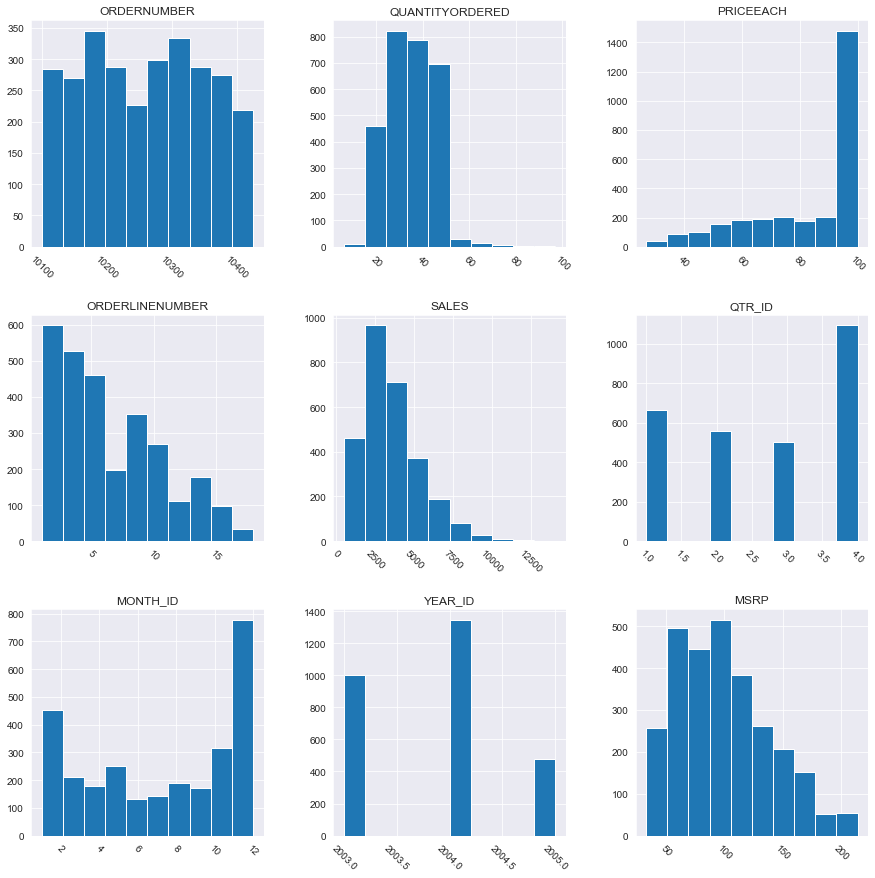

In [8]:
#Distribution
df.hist(figsize=(15,15), xrot=-45)

plt.show()

In [9]:
print(df[df.PRICEEACH <= 30].PRODUCTCODE.unique())
print(len(df[df.PRICEEACH <= 30].PRODUCTCODE))

['S18_2957' 'S24_1937' 'S24_2840']
11


## Data Cleaning

In [10]:
#check if there is duplicates
df = df.drop_duplicates()
print(df.shape)

(2823, 25)


In [11]:
#categorical features list 
df.describe(include='object')

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823,2823,2823,2823,2823,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,6,7,109,92,91,92,9,73,16,73,19,3,77,72,3
top,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,2617,967,52,259,259,259,55,304,416,259,1004,1407,259,259,1384


In [12]:
# Are there any typos or inconsistent capitalization in categorical features? 
print('Country:',df.COUNTRY.unique())

print('Product Line:',df.PRODUCTLINE.unique())

print('Status:',df.STATUS.unique())

Country: ['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']
Product Line: ['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']
Status: ['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']


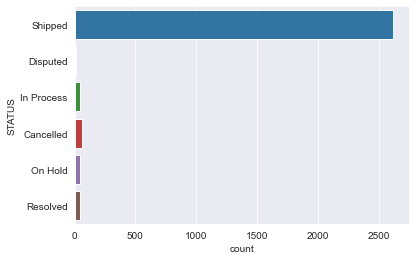

14


In [13]:
# CATEGORICAL FEATURES 
sns.countplot(y = 'STATUS', data = df)
plt.show()



print(len(df[df.STATUS == 'Disputed'].PRODUCTCODE))

In [14]:
# Drop 'Cancelled' status
df = df[df.STATUS != 'Cancelled']
df.shape

(2763, 25)

In [15]:
# Drop 'Disputed' status
df = df[df.STATUS != 'Disputed']
df.shape

(2749, 25)

In [16]:
#to make DEALSIZE numerical feature  
df['DEALSIZE'] = df.DEALSIZE.replace({'Small':0, 'Medium':1, 'Large':2})
print(df.DEALSIZE.unique())

[0 1 2]


In [17]:
df.groupby('DEALSIZE').mean()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
DEALSIZE,,,,,,,,,
0,10258.131894,30.556355,68.982838,6.641087,2061.442254,2.731415,7.128697,2003.811351,77.438849
1,10258.008915,37.955423,95.384889,6.382615,4403.931724,2.728826,7.121842,2003.803120,115.923477
2,10266.480263,46.828947,99.792961,5.467105,8285.343092,2.644737,6.848684,2003.875000,158.703947


In [18]:
# Is there any missing data ? 
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2447
CITY                   0
STATE               1431
POSTALCODE            76
COUNTRY                0
TERRITORY           1060
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

## Feature Engineering

In [19]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,0
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,0
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,1
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,1
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,1


In [20]:
df.groupby(by = ['ORDERNUMBER', 'ORDERLINENUMBER']).size()

ORDERNUMBER  ORDERLINENUMBER
10100        1                  1
             2                  1
             3                  1
             4                  1
10101        1                  1
                               ..
10425        9                  1
             10                 1
             11                 1
             12                 1
             13                 1
Length: 2749, dtype: int64

In [21]:
# DROP unused customer features : 

df = df.drop(['PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','CUSTOMERNAME','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME'], axis=1)


In [22]:
df.sort_values(by='ORDERNUMBER', ascending=False, na_position='first')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
679,10425,28,100.00,3,5318.04,2005-05-31,In Process,2,5,2005,Classic Cars,163,S18_2238,France,1
2172,10425,41,86.68,11,3553.88,2005-05-31,In Process,2,5,2005,Trucks and Buses,96,S32_1268,France,1
1465,10425,55,46.82,1,2575.10,2005-05-31,In Process,2,5,2005,Classic Cars,57,S24_1444,France,0
1341,10425,38,100.00,13,4325.16,2005-05-31,In Process,2,5,2005,Trucks and Buses,121,S18_4600,France,1
1064,10425,28,100.00,8,3793.16,2005-05-31,In Process,2,5,2005,Classic Cars,169,S18_3232,France,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,10101,26,100.00,1,3773.38,2003-01-09,Shipped,1,1,2003,Vintage Cars,168,S18_2795,Germany,1
1267,10100,22,86.51,4,1903.22,2003-01-06,Shipped,1,1,2003,Vintage Cars,92,S18_4409,USA,0
680,10100,50,67.80,2,3390.00,2003-01-06,Shipped,1,1,2003,Vintage Cars,60,S18_2248,USA,1
2024,10100,49,34.47,1,1689.03,2003-01-06,Shipped,1,1,2003,Vintage Cars,41,S24_3969,USA,0


In [23]:
# convert orderdate to month start 
# df['day']=1
# df['year']= df['YEAR_ID']
# df['month']= df['MONTH_ID']
#  
#     
# df['date']= pd.to_datetime(df[["year", "month", "day"]])    
# 
# df.head()

In [24]:
#DROP ORDERDATE
df = df.drop(['ORDERDATE'], axis=1)


In [25]:
#DROP PRICEEACH, SALES, STATUS, MSRP
df = df.drop(['PRICEEACH', 'SALES', 'STATUS', 'MSRP'], axis=1)

df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE
0,10107,30,2,1,2,2003,Motorcycles,S10_1678,USA,0
1,10121,34,5,2,5,2003,Motorcycles,S10_1678,France,0
2,10134,41,2,3,7,2003,Motorcycles,S10_1678,France,1
3,10145,45,6,3,8,2003,Motorcycles,S10_1678,USA,1
4,10159,49,14,4,10,2003,Motorcycles,S10_1678,USA,1


In [26]:
# data aggregation for orders ( to be checked if needed )

df = df.drop(['ORDERNUMBER','ORDERLINENUMBER'], axis=1)

df = df.groupby(['PRODUCTLINE','PRODUCTCODE','COUNTRY','DEALSIZE','QTR_ID','MONTH_ID','YEAR_ID']).agg({'QUANTITYORDERED':['sum']})
df.columns = ['TOTALQUANTITY']
df = df.reset_index()
df.head()

,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,QTR_ID,MONTH_ID,YEAR_ID,TOTALQUANTITY
0,Classic Cars,S10_1949,Australia,0,1,3,2005,24
1,Classic Cars,S10_1949,Australia,1,3,7,2004,21
2,Classic Cars,S10_1949,Australia,1,4,11,2004,30
3,Classic Cars,S10_1949,Australia,2,4,11,2003,34
4,Classic Cars,S10_1949,Canada,1,2,5,2005,23


In [27]:
# Get dummy variables and display COUNTRY, PRODUCTCODE, PRODUCTLINE
abt = pd.get_dummies( df, columns=['COUNTRY','PRODUCTCODE','PRODUCTLINE','QTR_ID','MONTH_ID','YEAR_ID'] )


abt.head()

,DEALSIZE,TOTALQUANTITY,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,PRODUCTCODE_S10_1678,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,PRODUCTCODE_S10_4698,PRODUCTCODE_S10_4757,PRODUCTCODE_S10_4962,PRODUCTCODE_S12_1099,PRODUCTCODE_S12_1108,PRODUCTCODE_S12_1666,PRODUCTCODE_S12_2823,PRODUCTCODE_S12_3148,PRODUCTCODE_S12_3380,PRODUCTCODE_S12_3891,PRODUCTCODE_S12_3990,PRODUCTCODE_S12_4473,PRODUCTCODE_S12_4675,PRODUCTCODE_S18_1097,PRODUCTCODE_S18_1129,PRODUCTCODE_S18_1342,PRODUCTCODE_S18_1367,PRODUCTCODE_S18_1589,PRODUCTCODE_S18_1662,PRODUCTCODE_S18_1749,PRODUCTCODE_S18_1889,PRODUCTCODE_S18_1984,PRODUCTCODE_S18_2238,PRODUCTCODE_S18_2248,PRODUCTCODE_S18_2319,PRODUCTCODE_S18_2325,...,PRODUCTCODE_S32_2206,PRODUCTCODE_S32_2509,PRODUCTCODE_S32_3207,PRODUCTCODE_S32_3522,PRODUCTCODE_S32_4289,PRODUCTCODE_S32_4485,PRODUCTCODE_S50_1341,PRODUCTCODE_S50_1392,PRODUCTCODE_S50_1514,PRODUCTCODE_S50_4713,PRODUCTCODE_S700_1138,PRODUCTCODE_S700_1691,PRODUCTCODE_S700_1938,PRODUCTCODE_S700_2047,PRODUCTCODE_S700_2466,PRODUCTCODE_S700_2610,PRODUCTCODE_S700_2824,PRODUCTCODE_S700_2834,PRODUCTCODE_S700_3167,PRODUCTCODE_S700_3505,PRODUCTCODE_S700_3962,PRODUCTCODE_S700_4002,PRODUCTCODE_S72_1253,PRODUCTCODE_S72_3212,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,QTR_ID_1,QTR_ID_2,QTR_ID_3,QTR_ID_4,MONTH_ID_1,MONTH_ID_2,MONTH_ID_3,MONTH_ID_4,MONTH_ID_5,MONTH_ID_6,MONTH_ID_7,MONTH_ID_8,MONTH_ID_9,MONTH_ID_10,MONTH_ID_11,MONTH_ID_12,YEAR_ID_2003,YEAR_ID_2004,YEAR_ID_2005
0,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Algorithm Selection

In [28]:
from sklearn.linear_model import LinearRegression

# Import Regularized Regression algos
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [29]:
# Why did you choose those algorithms?
# What are their practical benefits?
# What are the key hyperparameters to tune for your chosen algorithms?
df.head()

# abc = df.groupby(['date']).agg({'TOTALQUANTITY':['mean']})
# abc.columns = ['mean']
# abc = abc.reset_index()
# abc.head()

,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,QTR_ID,MONTH_ID,YEAR_ID,TOTALQUANTITY
0,Classic Cars,S10_1949,Australia,0,1,3,2005,24
1,Classic Cars,S10_1949,Australia,1,3,7,2004,21
2,Classic Cars,S10_1949,Australia,1,4,11,2004,30
3,Classic Cars,S10_1949,Australia,2,4,11,2003,34
4,Classic Cars,S10_1949,Canada,1,2,5,2005,23


## Model Training

Data Spending

In [31]:
#Have you split your dataset into separate training and test sets?
from sklearn.model_selection import train_test_split

In [32]:
y = abt.TOTALQUANTITY

X = abt.drop('TOTALQUANTITY', axis=1)

In [33]:
abt.head()

,DEALSIZE,TOTALQUANTITY,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,PRODUCTCODE_S10_1678,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,PRODUCTCODE_S10_4698,PRODUCTCODE_S10_4757,PRODUCTCODE_S10_4962,PRODUCTCODE_S12_1099,PRODUCTCODE_S12_1108,PRODUCTCODE_S12_1666,PRODUCTCODE_S12_2823,PRODUCTCODE_S12_3148,PRODUCTCODE_S12_3380,PRODUCTCODE_S12_3891,PRODUCTCODE_S12_3990,PRODUCTCODE_S12_4473,PRODUCTCODE_S12_4675,PRODUCTCODE_S18_1097,PRODUCTCODE_S18_1129,PRODUCTCODE_S18_1342,PRODUCTCODE_S18_1367,PRODUCTCODE_S18_1589,PRODUCTCODE_S18_1662,PRODUCTCODE_S18_1749,PRODUCTCODE_S18_1889,PRODUCTCODE_S18_1984,PRODUCTCODE_S18_2238,PRODUCTCODE_S18_2248,PRODUCTCODE_S18_2319,PRODUCTCODE_S18_2325,...,PRODUCTCODE_S32_2206,PRODUCTCODE_S32_2509,PRODUCTCODE_S32_3207,PRODUCTCODE_S32_3522,PRODUCTCODE_S32_4289,PRODUCTCODE_S32_4485,PRODUCTCODE_S50_1341,PRODUCTCODE_S50_1392,PRODUCTCODE_S50_1514,PRODUCTCODE_S50_4713,PRODUCTCODE_S700_1138,PRODUCTCODE_S700_1691,PRODUCTCODE_S700_1938,PRODUCTCODE_S700_2047,PRODUCTCODE_S700_2466,PRODUCTCODE_S700_2610,PRODUCTCODE_S700_2824,PRODUCTCODE_S700_2834,PRODUCTCODE_S700_3167,PRODUCTCODE_S700_3505,PRODUCTCODE_S700_3962,PRODUCTCODE_S700_4002,PRODUCTCODE_S72_1253,PRODUCTCODE_S72_3212,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,QTR_ID_1,QTR_ID_2,QTR_ID_3,QTR_ID_4,MONTH_ID_1,MONTH_ID_2,MONTH_ID_3,MONTH_ID_4,MONTH_ID_5,MONTH_ID_6,MONTH_ID_7,MONTH_ID_8,MONTH_ID_9,MONTH_ID_10,MONTH_ID_11,MONTH_ID_12,YEAR_ID_2003,YEAR_ID_2004,YEAR_ID_2005
0,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [34]:
#Have you set a random seed for replicable results?
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

print( len(X_train), len(X_test), len(y_train), len(y_test) )

2160 541 2160 541


In [35]:
#Do you understand the purpose and use-case of cross-validation?

#These are the steps for 10-fold cross-validation:

#Split your data into 10 equal parts, or "folds".
#Train your model on 9 folds (e.g. the first 9 folds).
#Evaluate it on the remaining "hold-out" fold (e.g. the last fold).
#Perform steps (2) and (3) 10 times, each time holding out a different fold.
#Average the performance across all 10 hold-out folds.

Pre-Processing & Pipelines

In [36]:
X_train.describe()

,DEALSIZE,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,PRODUCTCODE_S10_1678,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,PRODUCTCODE_S10_4698,PRODUCTCODE_S10_4757,PRODUCTCODE_S10_4962,PRODUCTCODE_S12_1099,PRODUCTCODE_S12_1108,PRODUCTCODE_S12_1666,PRODUCTCODE_S12_2823,PRODUCTCODE_S12_3148,PRODUCTCODE_S12_3380,PRODUCTCODE_S12_3891,PRODUCTCODE_S12_3990,PRODUCTCODE_S12_4473,PRODUCTCODE_S12_4675,PRODUCTCODE_S18_1097,PRODUCTCODE_S18_1129,PRODUCTCODE_S18_1342,PRODUCTCODE_S18_1367,PRODUCTCODE_S18_1589,PRODUCTCODE_S18_1662,PRODUCTCODE_S18_1749,PRODUCTCODE_S18_1889,PRODUCTCODE_S18_1984,PRODUCTCODE_S18_2238,PRODUCTCODE_S18_2248,PRODUCTCODE_S18_2319,PRODUCTCODE_S18_2325,PRODUCTCODE_S18_2432,...,PRODUCTCODE_S32_2206,PRODUCTCODE_S32_2509,PRODUCTCODE_S32_3207,PRODUCTCODE_S32_3522,PRODUCTCODE_S32_4289,PRODUCTCODE_S32_4485,PRODUCTCODE_S50_1341,PRODUCTCODE_S50_1392,PRODUCTCODE_S50_1514,PRODUCTCODE_S50_4713,PRODUCTCODE_S700_1138,PRODUCTCODE_S700_1691,PRODUCTCODE_S700_1938,PRODUCTCODE_S700_2047,PRODUCTCODE_S700_2466,PRODUCTCODE_S700_2610,PRODUCTCODE_S700_2824,PRODUCTCODE_S700_2834,PRODUCTCODE_S700_3167,PRODUCTCODE_S700_3505,PRODUCTCODE_S700_3962,PRODUCTCODE_S700_4002,PRODUCTCODE_S72_1253,PRODUCTCODE_S72_3212,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,QTR_ID_1,QTR_ID_2,QTR_ID_3,QTR_ID_4,MONTH_ID_1,MONTH_ID_2,MONTH_ID_3,MONTH_ID_4,MONTH_ID_5,MONTH_ID_6,MONTH_ID_7,MONTH_ID_8,MONTH_ID_9,MONTH_ID_10,MONTH_ID_11,MONTH_ID_12,YEAR_ID_2003,YEAR_ID_2004,YEAR_ID_2005
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,0.599074,0.068056,0.021296,0.011111,0.028704,0.026389,0.031944,0.114352,0.021296,0.005556,0.043519,0.020370,0.031481,0.010185,0.030556,0.119444,0.013426,0.012963,0.049074,0.340278,0.009259,0.009259,0.008333,0.009259,0.008796,0.009722,0.009722,0.010648,0.011111,0.007870,0.008333,0.009259,0.009259,0.009259,0.009722,0.006944,0.009259,0.007407,0.011574,0.009722,0.007870,0.009259,0.008796,0.007870,0.010185,0.007870,0.006944,0.009259,0.009259,0.008333,...,0.010185,0.010185,0.008333,0.011574,0.009259,0.010648,0.011111,0.010185,0.009259,0.007870,0.009259,0.010185,0.008796,0.008796,0.008796,0.009722,0.011111,0.007870,0.008333,0.008333,0.008333,0.010185,0.007870,0.009259,0.336111,0.118519,0.107870,0.080093,0.026389,0.108796,0.222222,0.242593,0.187963,0.186111,0.383333,0.084722,0.083333,0.074537,0.065278,0.083796,0.038889,0.052315,0.071759,0.062037,0.110648,0.205093,0.067593,0.352778,0.477778,0.169444
std,0.597508,0.251900,0.144404,0.104846,0.167011,0.1603

In [37]:
from sklearn.pipeline import make_pipeline

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler

In [39]:
pipe = make_pipeline(
StandardScaler(),
LogisticRegression())


In [40]:
pipe2= make_pipeline(MinMaxScaler(), LogisticRegression())

In [41]:
pipe2.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'logisticregression': LogisticRegression(),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [43]:
pipelines = {
    'lasso' : make_pipeline(MinMaxScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(MinMaxScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(MinMaxScaler(), ElasticNet(random_state=123))
}

#Tunning

In [44]:
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('lasso', Lasso(random_state=123))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'lasso': Lasso(random_state=123),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [45]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

In [46]:
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [47]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [48]:
# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [49]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [52]:
type(model)

sklearn.model_selection._search.GridSearchCV

In [53]:
model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('lasso', Lasso(random_state=123))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

In [54]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.


In [55]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>


In [56]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.


In [57]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.22360009828377247
ridge 0.22489349791595484
enet 0.22589375373850387


In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [62]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.25552024905536797
MAE: 7.163907841245482

ridge
--------
R^2: 0.24877906160225127
MAE: 7.195391107938959

enet
--------
R^2: 0.24948455387706858
MAE: 7.192381161019717



In [67]:
#Highest R2: Lasso

#Lowest MAE: Lasso

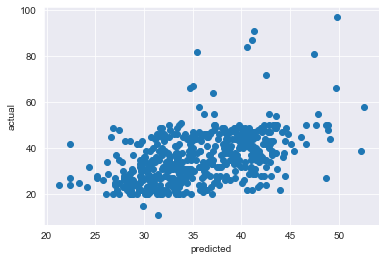

In [68]:
lasso_pred = fitted_models['lasso'].predict(X_test)
plt.scatter(lasso_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [69]:
type(fitted_models['lasso'])

sklearn.model_selection._search.GridSearchCV

In [70]:
type(fitted_models['lasso'].best_estimator_)

sklearn.pipeline.Pipeline

In [71]:
fitted_models['lasso'].best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=0.01, random_state=123))])

In [72]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['lasso'].best_estimator_, f)

In [ ]:
# best fitted model is Lasso 